In [1]:
%cd /content/drive/MyDrive/compvis/Car_Measure/
!pwd 

/content/drive/MyDrive/compvis/Car_Measure
/content/drive/MyDrive/compvis/Car_Measure


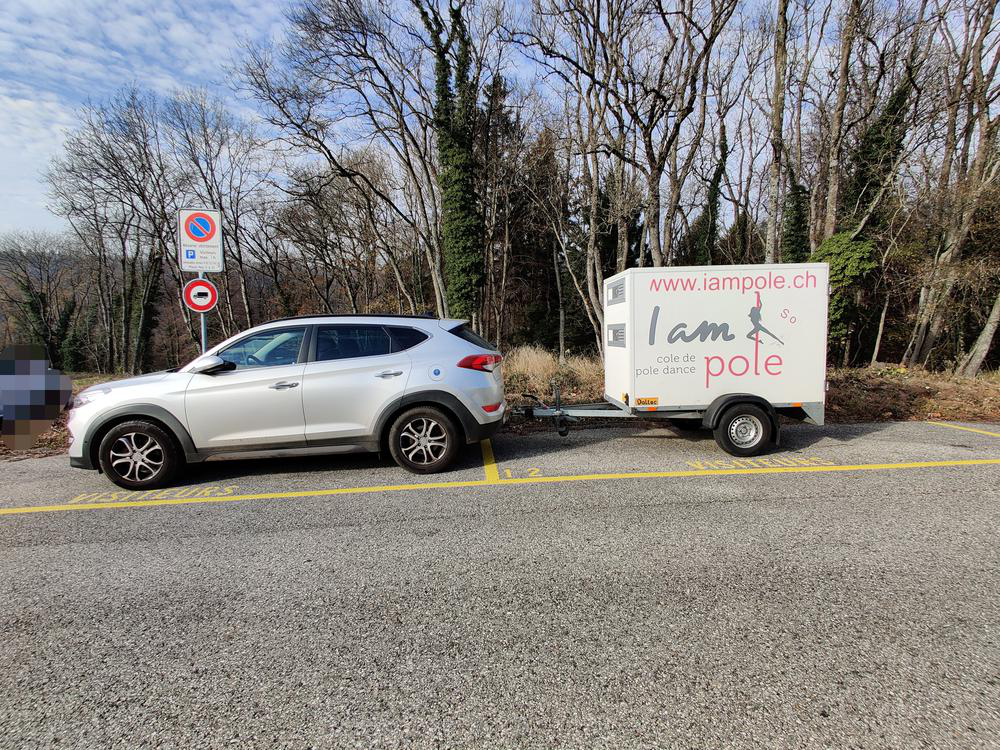

In [100]:
from PIL import Image
im = Image.open('./car-segmentation/images/IMG_20201123_133510__01.png').convert('RGB')
im

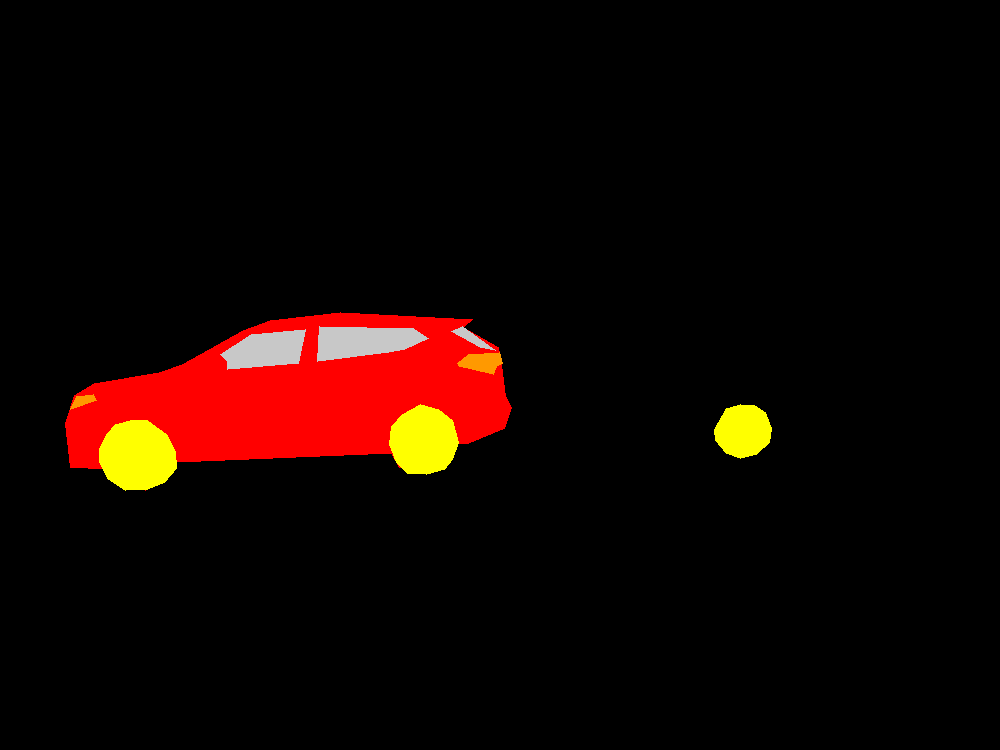

In [101]:

mask = Image.open('./car-segmentation/masks/IMG_20201123_133510__01.png').convert('P') 
mask.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
    200,200,200, # index 4
])
mask

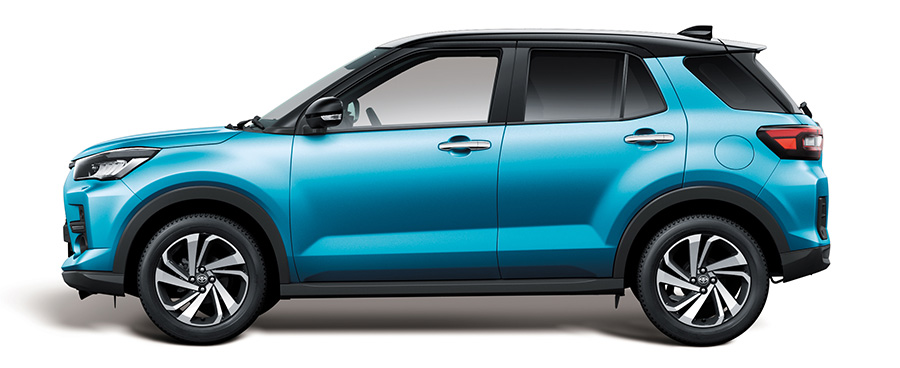

In [102]:
from PIL import Image
im = Image.open('./car-segmentation/images/003.png').convert('RGB')
im.save("pic.png", format="png")
im

In [103]:
import numpy as np
mask = Image.open('./car-segmentation/masks/003.png').convert('P') 
mask.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
    200,200,200, # index 4
])
mask = np.array(mask)
mask = np.where(mask > 2, 1, mask)

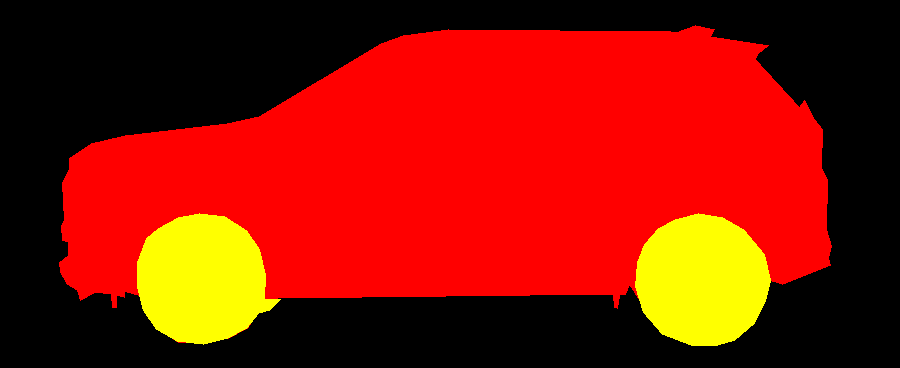

In [104]:
im = Image.fromarray(mask)
im.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
])
im

In [105]:
obj_ids = np.unique(mask)
obj_ids = obj_ids[1:]
masks = mask == obj_ids[:, None, None]

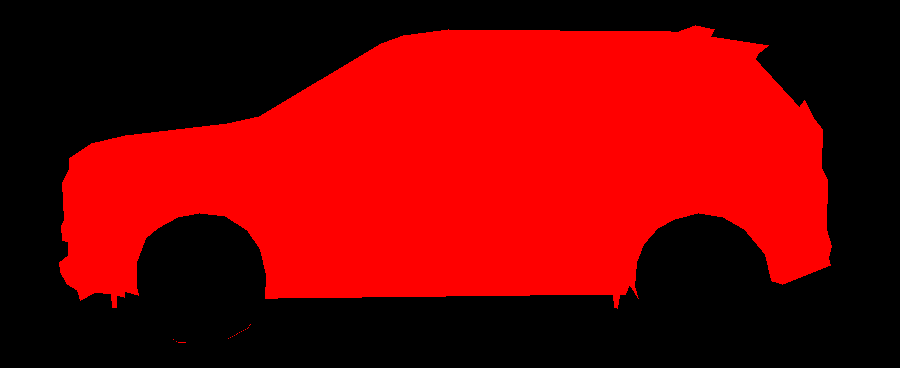

In [106]:
im = Image.fromarray(np.array(masks[0])).convert('P') 
im.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
])
im
im.save("mask_1.png", format="png")
im

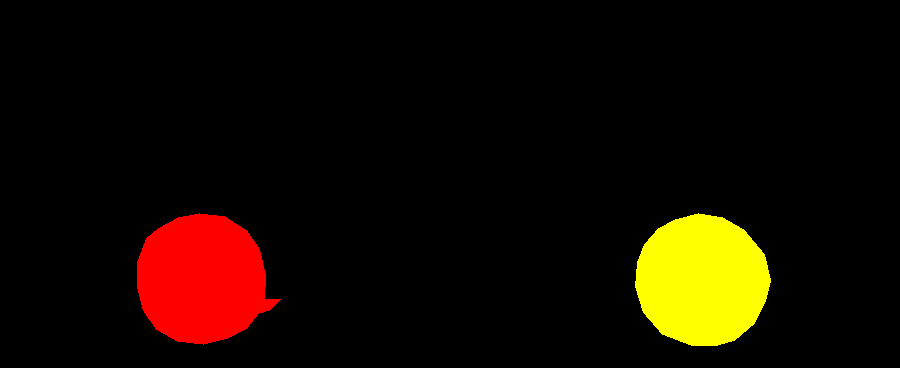

In [107]:
from scipy import ndimage
labeled_array, num_features = ndimage.label(np.array(masks[1]), np.ones((3,3)))
im = Image.fromarray(labeled_array).convert('P') 
im.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
])
#print(np.unique(im))
im.save("mask_2.png", format="png")
im

In [112]:
import os
from scipy import ndimage

path = os.listdir('./car-segmentation/images/')
print("Len of Images", len(path))
count = 1
for ii in path:
  img_name = ii.replace('.png','')
  print(img_name, count ," out of ", len(path))
  mask = Image.open('./car-segmentation/masks/'+img_name+'.png').convert('P')
  mask.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
    200,200,200, # index 4
  ])
  mask = np.array(mask)
  mask = np.where(mask > 2, 1, mask)
  obj_ids = np.unique(mask)
  obj_ids = obj_ids[1:]
  masks = mask == obj_ids[:, None, None]
  mask_1 = Image.fromarray(masks[0]).convert('P')
  mask_1 = np.array(mask_1)
  mask_1 = np.where(mask_1 == 255, 1, mask_1)
  mask_1 = Image.fromarray(mask_1).convert('P')
  mask_1.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
    200,200,200, # index 4
  ])
  mask_1.save('./car-segmentation/new_masks/'+img_name+"_mask_1.png", format="png")

  labeled_array, num_features = ndimage.label(np.array(masks[1]), np.ones((3,3)))
  mask_2 = Image.fromarray(labeled_array).convert('P') 
  mask_2.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
    200,200,200, # index 4
  ])
  mask_2.save('./car-segmentation/new_masks/'+img_name+"_mask_2.png", format="png")
  count = count + 1
  
print("Len of New Masks", len(os.listdir('./car-segmentation/new_masks/')))

Len of Images 204
178583_Side_Profile_Web 1  out of  204
156551_preview 2  out of  204
105618639-modern-pale-blue-suv-car-side-view 3  out of  204
105618339-super-purple-modern-suv-car-side-view 4  out of  204
003 5  out of  204
Haa04c90142df4a01829fd6d84b7b3347H 6  out of  204
IMG_20201123_131711 7  out of  204
2018-bm4-gt4-sports-car-side-view-pk 8  out of  204
47865-Kit-Bandes-Bas-Caisse-Porsche-Boxster 9  out of  204
2019-ferrari-488-spider-side-view-carbuzz-669506 10  out of  204
Hba200d821f7b485cb1975db750260e88o 11  out of  204
75-752748_red-jaguar-f-type-car-side-view-png 12  out of  204
2020-Honda-City-7-1068x672 13  out of  204
75538664-compact-suv-car-side-view 14  out of  204
2015_aston_martin_db10_4 15  out of  204
62271369-ehrf%C3%BCrchtig-gelb-muscle-car-seitenansicht 16  out of  204
G40-Junior-GT5-car-side 17  out of  204
2018-nissan-sentra-2017-nissan-sentra-car-nissan-micra-png-f 18  out of  204
2008-Morgan-Life-Car-Side-Speed-1024x768 19  out of  204
8b21a8c96a9d3814